## Install and Import Packages

In [61]:
# to install required packages which are listed in the requirements.txt
! pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------- 275.7/275.7 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 435.6/435.6 kB 13.7 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=3753b2ce97fdc148045c0df0435bb0f162c5edfe1048c64289b1cd334a3b96d0
  Stored in directory: c:\users\ab68180\appdata\local\pip\cache\wheels\ed\d7\c9\5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [62]:
# Import all the packages required for this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import time
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, GRU
from tensorflow.keras.callbacks import History 


from lime.lime_text import LimeTextExplainer


from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")

# Read Data

In [63]:
real = pd.read_csv("True.csv")
real.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [64]:
fake = pd.read_csv("Fake.csv")
fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [65]:
# Create Target based on Real and Fake data
real['Category'] = 1
fake['Category'] = 0

In [66]:
print(real.shape)
real.head()

(21417, 5)


title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  Category  
0  December 31, 2017          1  
1  December 29, 2017          1  
2  December 31, 2017          1  
3  December 30, 2017          1  
4  December 29, 2017          1

In [67]:
print(fake.shape)
fake.head()

(23481, 5)


title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  Category  
0  December 31, 2017         0  
1  December 31, 2017         0  
2  December 30, 2017         0  
3  December 29, 2017         0  
4  December 25, 2017         0

### combine true and fake data

In [68]:
dataset = pd.concat([real, fake]).reset_index(drop=True)

In [69]:
print(dataset.shape)
dataset.head()

(44898, 5)


title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  Category  
0  December 31, 2017          1  
1  December 29, 2017          1  
2  December 31, 2017          1  
3  December 30, 2017          1  
4  December 29, 2017          1

# Data Analysis

#### Missing value Treatment

In [70]:
dataset.isnull().sum()

title       0
text        0
subject     0
date        0
Category    0
dtype: int64

In [71]:
dataset.shape

(44898, 5)

<p> There is aren't any missing values in the dataset, so we are continuing with further exploration

#### Drop Duplicates if any

In [72]:
dataset.drop_duplicates(inplace=True)

In [73]:
dataset.shape

(44689, 5)

#### Merge Title and Text data

In [74]:
dataset['final_text'] = dataset['title'] + dataset['text']
dataset['final_text'].head()

0    As U.S. budget fight looms, Republicans flip t...
1    U.S. military to accept transgender recruits o...
2    Senior U.S. Republican senator: 'Let Mr. Muell...
3    FBI Russia probe helped by Australian diplomat...
4    Trump wants Postal Service to charge 'much mor...
Name: final_text, dtype: object

In [75]:
dataset['Category'].value_counts()

0    23478
1    21211
Name: Category, dtype: int64

#### Exploratory Data Analysis

[Text(0, 0, 'politicsNews'),
 Text(1, 0, 'worldnews'),
 Text(2, 0, 'News'),
 Text(3, 0, 'politics'),
 Text(4, 0, 'Government News'),
 Text(5, 0, 'left-news'),
 Text(6, 0, 'US_News'),
 Text(7, 0, 'Middle-east')]

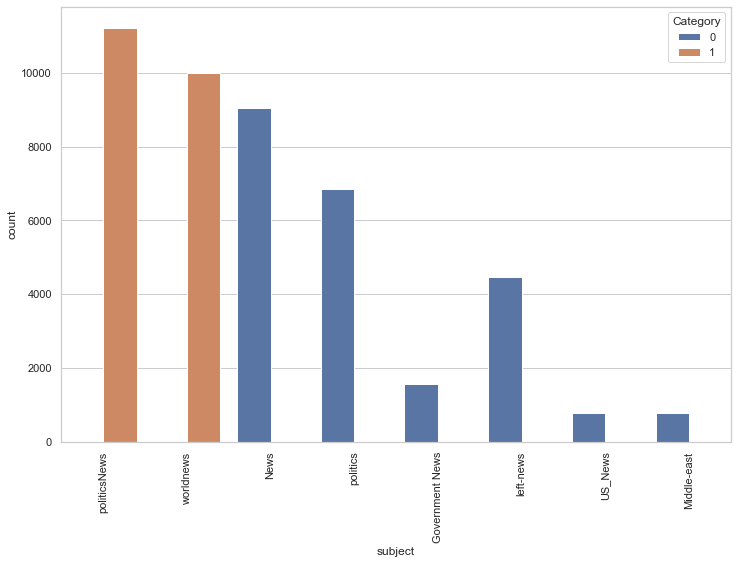

In [76]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1)
chart = sns.countplot(x = "subject", hue = "Category" , data = dataset)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

<AxesSubplot:xlabel='Category', ylabel='count'>

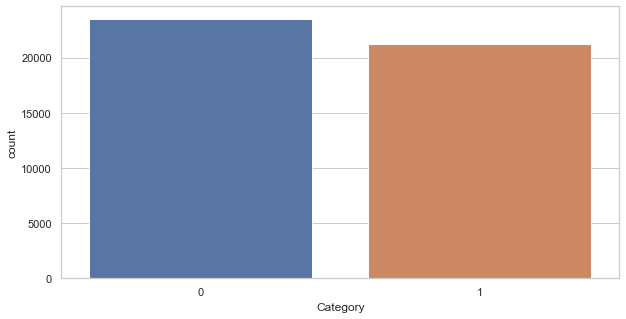

In [77]:
plt.figure(figsize=(10,5))
sns.countplot(x= "Category", data=dataset)

In [78]:
dataset = dataset[['final_text', 'Category']]

# Data Cleaning

#### Preprocessing Text to get Stemmed and Lemmatized Corpus

In [79]:
porter_stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [80]:
# # run only once - to download nltk modules
#nltk.download('all')

In [81]:
# for stemming and lemmatizing the text
"""stemmed_text = []
lemmatized_text = []
final_text_result = []
for text in dataset['final_text']:
    result = re.sub('[^a-zA-Z]', ' ', text)
    #result = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", ' ', text)
    result = result.lower()
    result = result.split()
    result = [r for r in result if r not in set(stopwords.words('english'))]
    final_text_result.append(" ".join(result))
    stemmed_result = [porter_stemmer.stem(r) for r in result]
    stemmed_text.append(" ".join(stemmed_result))
    lemmatized_result = [lemmatizer.lemmatize(r) for r in result]
    lemmatized_text.append(" ".join(lemmatized_result))"""

'stemmed_text = []\nlemmatized_text = []\nfinal_text_result = []\nfor text in dataset[\'final_text\']:\n    result = re.sub(\'[^a-zA-Z]\', \' \', text)\n    #result = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\\w+:\\/\\/\\S+)|^rt|http.+?", \' \', text)\n    result = result.lower()\n    result = result.split()\n    result = [r for r in result if r not in set(stopwords.words(\'english\'))]\n    final_text_result.append(" ".join(result))\n    stemmed_result = [porter_stemmer.stem(r) for r in result]\n    stemmed_text.append(" ".join(stemmed_result))\n    lemmatized_result = [lemmatizer.lemmatize(r) for r in result]\n    lemmatized_text.append(" ".join(lemmatized_result))'

In [82]:
"""np.save('final_text_result.npy', final_text_result)
np.save('stemmed_text.npy', stemmed_text)
np.save('lemmatized_text.npy', lemmatized_text)"""

"np.save('final_text_result.npy', final_text_result)\nnp.save('stemmed_text.npy', stemmed_text)\nnp.save('lemmatized_text.npy', lemmatized_text)"

In [83]:
stemmed_text = np.load('stemmed_text.npy')
lemmatized_text = np.load('lemmatized_text.npy')

In [84]:
print(len(stemmed_text))
print(len(lemmatized_text))

44689
44689
44689


### WordCloud for label=1 -- Real News

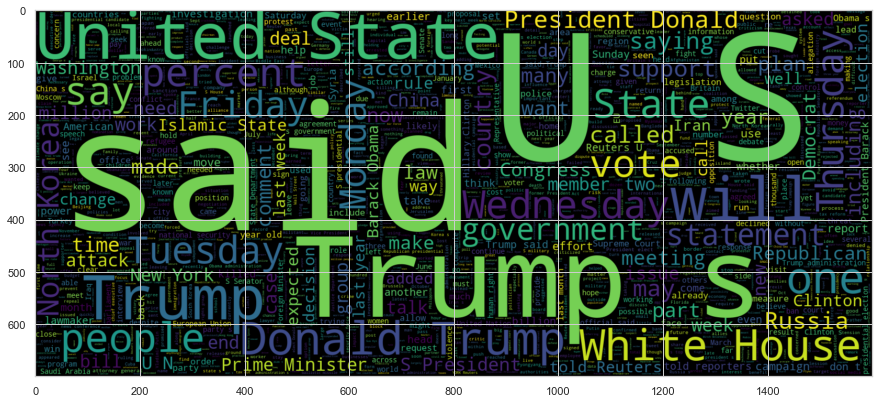

In [85]:
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(dataset[dataset.Category==1].final_text))
plt.imshow(wc, interpolation="bilinear")

### WordCloud for label=0 -- Fake News

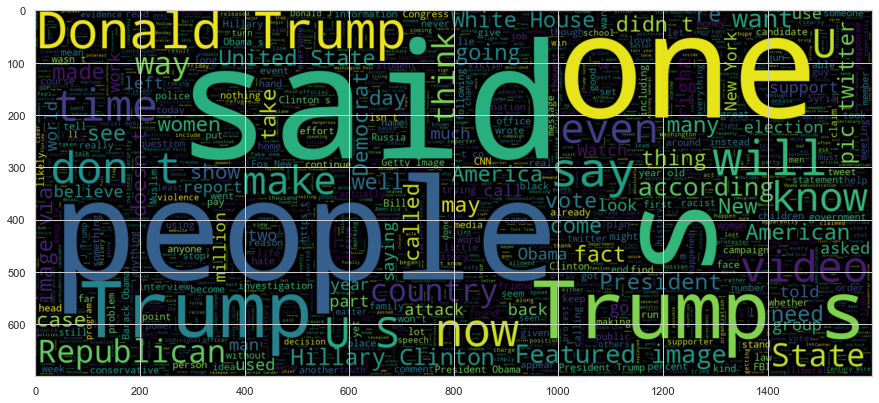

In [86]:
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(dataset[dataset.Category==0].final_text))
plt.imshow(wc, interpolation="bilinear")

In [87]:
def get_ngrams(text, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

### unigrams

<AxesSubplot:>

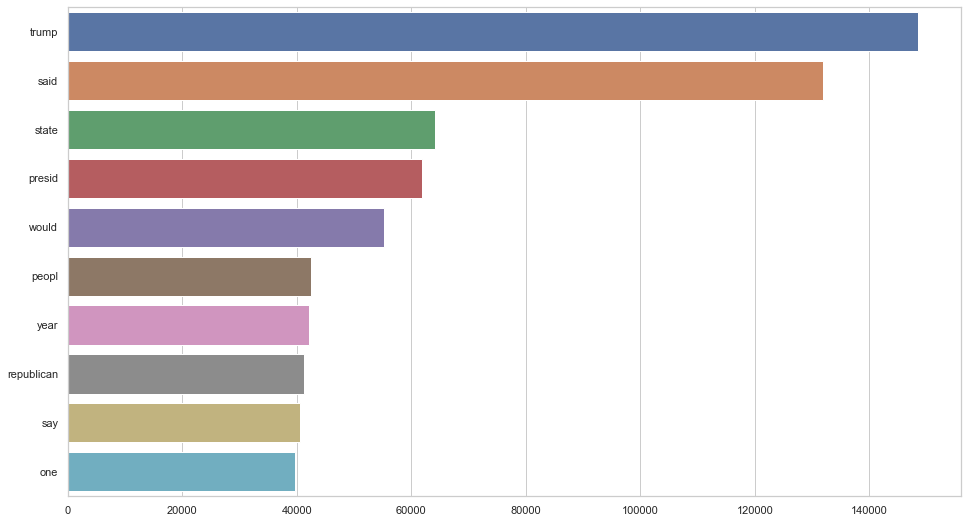

In [88]:
plt.figure(figsize = (16,9))
most_common_uni = get_ngrams(stemmed_text,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

#### 'trump' is the most occuring word in the corpus

## Create models using CountVectorizer and TFIDF Vectorizer with stemmed text and lemmatized text

In [89]:
def get_prediction(vectorizer, classifier, X_train, X_test, y_train, y_test):
    pipe = Pipeline([('vector', vectorizer),
                    ('model', classifier)])
    model = pipe.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #print(model.predict_proba([X_test[0]]))
    print("Accuarcy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: \n", cm)
    print("Classification Report: \n", classification_report(y_test, y_pred))

In [90]:
len(stemmed_text)

44689

In [91]:
len(dataset['Category'])

44689

In [92]:
print("******USING STEMMED TEXT********")
X_train, X_test, y_train, y_test = train_test_split(stemmed_text, dataset['Category'], test_size = 0.3, random_state= 0)
classifiers = [LogisticRegression(), SGDClassifier(), KNeighborsClassifier(n_neighbors=25), DecisionTreeClassifier(), GradientBoostingClassifier(), 
               RandomForestClassifier(), XGBClassifier()]
for classifier in classifiers:
    print("\n\n", classifier)
    print("***********Using Count Vectorizer****************")
    get_prediction(CountVectorizer(), classifier, X_train, X_test, y_train, y_test)
    print("***********Using TFIDF Vectorizer****************")
    get_prediction(TfidfVectorizer(), classifier, X_train, X_test, y_train, y_test)

******USING STEMMED TEXT********


 LogisticRegression()
***********Using Count Vectorizer****************
Accuarcy: 99.54
Confusion Matrix: 
 [[7047   32]
 [  30 6298]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7079
           1       0.99      1.00      1.00      6328

    accuracy                           1.00     13407
   macro avg       1.00      1.00      1.00     13407
weighted avg       1.00      1.00      1.00     13407

***********Using TFIDF Vectorizer****************
Accuarcy: 98.66
Confusion Matrix: 
 [[6962  117]
 [  63 6265]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      7079
           1       0.98      0.99      0.99      6328

    accuracy                           0.99     13407
   macro avg       0.99      0.99      0.99     13407
weighted avg       0.99      0.99      0.99     13407



 SGDClassif

#### CountVectorizer with XGB model performing best with 99.84% test accuracy

In [93]:
try:     
     classifiers = [LogisticRegression(), SGDClassifier(),
               KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier(), GradientBoostingClassifier(), 
                    RandomForestClassifier(), XGBClassifier()]
     model = VotingClassifier(estimators=list(zip(["lr","sgdc","knnc","dtr","gbc",'rfc', 'xgbc'],classifiers)),voting="hard")
     name = 'Voting Classifier'
     labels = [0, 1]
     start_time = time.time()
     vectorizer = CountVectorizer()
     pipe = Pipeline([('vector', vectorizer),
                         ('model', model)])
     model = pipe.fit(X_train, y_train)
     time_of_model = round((time.time() - start_time) / 60, 2)
     print("Time of fitting: %s minutes" % (time_of_model))
     y_pred = model.predict(X_test)
     accuracy = metrics.accuracy_score(y_test, y_pred)
     f1_scores = metrics.f1_score(y_test, y_pred, labels=labels, average=None)
     f1_score_weighted = metrics.f1_score(y_test, y_pred, labels=labels, average='weighted')
     print('F1 score, class Unrelated: %.2f%%' % (f1_scores[0]*100),'\n'
          'F1 score, class Disagree: %.2f%%' % (f1_scores[1]*100))
     print("F1 score weighted: %.2f%%" % (f1_score_weighted * 100.0))
     print("Test Accuracy: %.2f%%" % (accuracy * 100.0))
     print("Classification Report: \n", classification_report(y_test, y_pred))
except:
     print("continued")

Time of fitting: 2.07 minutes
F1 score, class Unrelated: 99.80% 
F1 score, class Disagree: 99.78%
F1 score weighted: 99.79%
Test Accuracy: 99.79%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7079
           1       1.00      1.00      1.00      6328

    accuracy                           1.00     13407
   macro avg       1.00      1.00      1.00     13407
weighted avg       1.00      1.00      1.00     13407



In [94]:
vectorizer = TfidfVectorizer(lowercase=False)
rf = RandomForestClassifier()
pipe = Pipeline([('vector', vectorizer),
                    ('model', rf)])
model = pipe.fit(X_train, y_train)
idx = 83

In [95]:
pred = model.predict(X_test[idx-1:idx+1])

### model predictions explainations using LIME

In [96]:
class_names = ['real', 'fake']
explainer = LimeTextExplainer(class_names=class_names)

In [97]:
idx = 83
exp = explainer.explain_instance(X_test[idx], model.predict_proba, num_features=10)
print(y_test[idx])

1


In [98]:
exp.show_in_notebook(text=True)

Random Forest model with TF-IDF vectorizer is selected as best model and selected for LIME explanation as denoted in Figure. These Figures explain the reasons for the output. For e.g., in Figure the prediction probabilities with word importance’s and the same words highlighted in the text. This denoted word ‘reuter’ has 18% weightage or importance in classifying the article as fake followed by word ‘said’ and ‘minist. The explanations from the XGB and Random forest models is different in terms of weight of the words in classification. This shows even though the models show the same classification result, the reason for the classification can be completely opposite.

In [99]:
idx = 2
exp = explainer.explain_instance(X_test[idx], model.predict_proba, num_features=10)
exp.show_in_notebook(text=True)

In [100]:
print("******USING LEMMATIZED TEXT********")
X_train, X_test, y_train, y_test = train_test_split(lemmatized_text, dataset['Category'], test_size = 0.3, random_state= 0)
classifiers = [LogisticRegression(), SGDClassifier(),
              KNeighborsClassifier(n_neighbors=25), DecisionTreeClassifier(), GradientBoostingClassifier(), 
               RandomForestClassifier(), XGBClassifier()]
for classifier in classifiers:
    print("\n\n", classifier)
    print("***********Usng Count Vectorizer****************")
    get_prediction(CountVectorizer(), classifier, X_train, X_test, y_train, y_test)
    print("***********Usng TFIDF Vectorizer****************")
    get_prediction(TfidfVectorizer(), classifier, X_train, X_test, y_train, y_test)

******USING LEMMATIZED TEXT********


 LogisticRegression()
***********Usng Count Vectorizer****************
Accuarcy: 99.59
Confusion Matrix: 
 [[7046   33]
 [  22 6306]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7079
           1       0.99      1.00      1.00      6328

    accuracy                           1.00     13407
   macro avg       1.00      1.00      1.00     13407
weighted avg       1.00      1.00      1.00     13407

***********Usng TFIDF Vectorizer****************
Accuarcy: 98.72
Confusion Matrix: 
 [[6970  109]
 [  63 6265]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      7079
           1       0.98      0.99      0.99      6328

    accuracy                           0.99     13407
   macro avg       0.99      0.99      0.99     13407
weighted avg       0.99      0.99      0.99     13407



 SGDClassi

#### CountVectorizer with XGB model performing best with 99.84% test accuracy

In [101]:
try:
     classifiers = [LogisticRegression(), SGDClassifier(),
          KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier(), GradientBoostingClassifier(), 
               RandomForestClassifier(), XGBClassifier()]
     model = VotingClassifier(estimators=list(zip(["lr","sgdc","knnc","dtr","gbc",'rfc', 'xgbc'],classifiers)),voting="hard")
     name = 'Voting Classifier'
     labels = [0, 1]
     start_time = time.time()
     vectorizer = CountVectorizer()
     pipe = Pipeline([('vector', vectorizer),
                         ('model', model)])
     model = pipe.fit(X_train, y_train)
     time_of_model = round((time.time() - start_time) / 60, 2)
     print("Time of fitting: %s minutes" % (time_of_model))
     y_pred = model.predict(X_test)
     accuracy = metrics.accuracy_score(y_test, y_pred)
     f1_scores = metrics.f1_score(y_test, y_pred, labels=labels, average=None)
     f1_score_weighted = metrics.f1_score(y_test, y_pred, labels=labels, average='weighted')
     print('F1 score, class Unrelated: %.2f%%' % (f1_scores[0]*100),'\n'
          'F1 score, class Disagree: %.2f%%' % (f1_scores[1]*100))
     print("F1 score weighted: %.2f%%" % (f1_score_weighted * 100.0))
     print("Test Accuracy: %.2f%%" % (accuracy * 100.0))
     print("Classification Report: \n", classification_report(y_test, y_pred))
except:
     print("continued")

Time of fitting: 2.86 minutes
F1 score, class Unrelated: 99.78% 
F1 score, class Disagree: 99.76%
F1 score weighted: 99.77%
Test Accuracy: 99.77%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7079
           1       1.00      1.00      1.00      6328

    accuracy                           1.00     13407
   macro avg       1.00      1.00      1.00     13407
weighted avg       1.00      1.00      1.00     13407



In [102]:
vectorizer = TfidfVectorizer()
rf = RandomForestClassifier()
pipe = Pipeline([('vector', vectorizer),
                    ('model', rf)])
model = pipe.fit(X_train, y_train)
idx = 10
class_names = ['fake', 'real']
explainer = LimeTextExplainer(class_names=class_names)
exp = explainer.explain_instance(X_test[idx], model.predict_proba, num_features=10)
exp.show_in_notebook(text=True)

In [103]:
idx = 2
exp = explainer.explain_instance(X_test[idx], model.predict_proba, num_features=10)
exp.show_in_notebook(text=True)

### Using One Hot vector on stemmed text and LSTM model

In [104]:
import tensorflow as tf
print(tf.__version__)

2.9.1


### import modules for deep learning models - Keras

In [2]:
from keras.preprocessing.text import one_hot
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM
from keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping,ModelCheckpoint

#### Using One hot representation using Stemmed Text

In [ ]:
voc_size = 5000
onehot_stemmed_text = [one_hot(word, voc_size) for word in stemmed_text]
print(len(onehot_stemmed_text))
onehot_stemmed_text[0]

44689


[1086,
 3955,
 1727,
 4302,
 2005,
 1966,
 1518,
 2566,
 3758,
 3091,
 1185,
 2005,
 1637,
 1086,
 4379,
 2298,
 416,
 1506,
 3795,
 4655,
 2672,
 1772,
 3649,
 3420,
 4242,
 1518,
 1185,
 3738,
 2395,
 3955,
 1074,
 3502,
 2550,
 1303,
 2671,
 2482,
 2866,
 2005,
 1086,
 2570,
 1089,
 1926,
 1369,
 2669,
 2761,
 4655,
 3507,
 534,
 3564,
 1760,
 3025,
 922,
 1774,
 4398,
 3038,
 1946,
 4566,
 3163,
 922,
 1428,
 1373,
 4115,
 1760,
 3955,
 1727,
 2282,
 2554,
 351,
 2665,
 1131,
 3380,
 2566,
 659,
 4573,
 3862,
 3760,
 2005,
 2108,
 2550,
 2560,
 4379,
 1773,
 945,
 2644,
 2005,
 1081,
 3720,
 3955,
 900,
 1636,
 3025,
 2177,
 1,
 1081,
 4685,
 900,
 2494,
 678,
 990,
 3025,
 691,
 1284,
 4116,
 4864,
 4772,
 2666,
 3489,
 2377,
 466,
 3420,
 2644,
 3466,
 433,
 1685,
 254,
 3747,
 900,
 2494,
 678,
 990,
 3025,
 3898,
 3997,
 1926,
 774,
 1175,
 3222,
 1944,
 2924,
 3973,
 1585,
 691,
 2177,
 254,
 2007,
 2379,
 4828,
 2348,
 1772,
 1694,
 3889,
 2626,
 3997,
 1518,
 1185,
 3707,
 3

### embedding must be padded - naturally, some of the sentences are longer or shorter. We need to have the inputs with the same size, this is where the padding is necessary

In [ ]:
sent_length = 400
embedded_text = pad_sequences(onehot_stemmed_text, padding='pre', maxlen=sent_length)
print(embedded_text)

[[1727 2282 2554 ...  799 2298 1545]
 [   0    0    0 ... 2781 3917 4633]
 [   0    0    0 ... 1034 4665 1585]
 ...
 [  47 4592  503 ... 3540 4592 1131]
 [   0    0    0 ... 3540 1342  470]
 [2957 4993 4152 ... 3540 1502 1131]]


### define model architecture

In [ ]:
embedding_vector_features = 600
model1 = Sequential()
model1.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model1.add(LSTM(100))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 600)          3000000   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               280400    
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 3,280,501
Trainable params: 3,280,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_final = np.array(embedded_text)
y_final = dataset['Category']

In [ ]:
X_final.shape,y_final.shape

((44689, 400), (44689,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.3, random_state = 0)

### define model parameters

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, mode='auto')
check_point = ModelCheckpoint('onehot_stemmed_LSTM_model.h5',monitor='val_loss', verbose=1, save_best_only=True)
model1_history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size = 256, callbacks=([reduce_lr, early_stop, check_point]))

#### Evaluate model

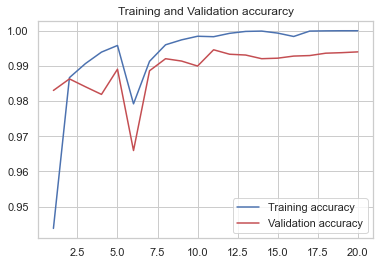

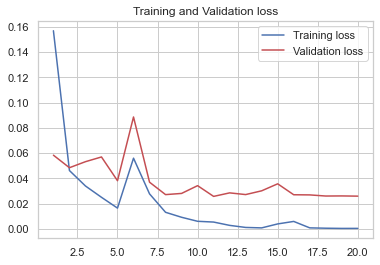

In [ ]:
acc = model1_history.history['accuracy']
val_acc = model1_history.history['val_accuracy']
loss = model1_history.history['loss']
val_loss = model1_history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
model1 = load_model('onehot_stemmed_LSTM_model.h5')
y_pred = model1.predict_classes(X_test)
print("Accuracy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy: 99.46


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[7040   39]
 [  34 6294]]


In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      7079
           1       0.99      0.99      0.99      6328

    accuracy                           0.99     13407
   macro avg       0.99      0.99      0.99     13407
weighted avg       0.99      0.99      0.99     13407



### Using One hot representation using Lemmatized Text

In [ ]:
voc_size = 5000
onehot_lemmatized_text = [one_hot(word, voc_size) for word in lemmatized_text]
print(len(onehot_lemmatized_text))
onehot_lemmatized_text[0]

44689


[1086,
 3955,
 1727,
 4302,
 2005,
 1966,
 1518,
 2566,
 3461,
 3091,
 4778,
 2005,
 1637,
 1086,
 4379,
 2775,
 416,
 1506,
 669,
 2330,
 2672,
 1772,
 3649,
 3420,
 3260,
 1518,
 4778,
 3738,
 1519,
 3955,
 1074,
 3502,
 972,
 1303,
 2671,
 2482,
 2866,
 2005,
 1086,
 2468,
 1089,
 1926,
 1478,
 2362,
 2761,
 4655,
 3507,
 534,
 3564,
 1982,
 1489,
 1075,
 2341,
 49,
 4760,
 1946,
 4566,
 3163,
 1075,
 1428,
 710,
 2828,
 1982,
 3955,
 1727,
 2626,
 605,
 3901,
 3244,
 2764,
 3380,
 1824,
 2106,
 2653,
 3862,
 3760,
 2005,
 2108,
 2550,
 2560,
 4379,
 3826,
 945,
 2644,
 2005,
 1081,
 3720,
 3955,
 1760,
 3287,
 1489,
 2177,
 1,
 1081,
 1329,
 1760,
 2494,
 9,
 1202,
 1489,
 691,
 1284,
 3293,
 509,
 4772,
 4553,
 3489,
 2377,
 1634,
 1007,
 2644,
 1339,
 3056,
 3935,
 254,
 3437,
 1760,
 2494,
 9,
 1202,
 1489,
 3898,
 3997,
 1926,
 774,
 1175,
 32,
 1547,
 2924,
 247,
 1585,
 691,
 2177,
 4064,
 2007,
 2379,
 4828,
 1999,
 1772,
 4934,
 3889,
 2626,
 3997,
 1518,
 4778,
 3707,
 287

In [ ]:
sent_length = 400
embedded_text = pad_sequences(onehot_lemmatized_text, padding='pre', maxlen=sent_length)
print(embedded_text)

[[1727 2626  605 ...  799 2775 1545]
 [   0    0    0 ... 3214 3917 1526]
 [   0    0    0 ... 1086 1528 1585]
 ...
 [  47 4592  638 ... 3540 4592 1131]
 [   0    0    0 ... 3540 1342  470]
 [2957 4993 4152 ... 3540 1502 1131]]


In [ ]:
embedding_vector_features = 600
model2 = Sequential()
model2.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model2.add(LSTM(100))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 600)          3000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               280400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 3,280,501
Trainable params: 3,280,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_final = np.array(embedded_text)
y_final = dataset['Category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.3, random_state = 0)

In [ ]:
check_point = ModelCheckpoint('onehot_lemm_LSTM_model.h5',monitor='val_loss', verbose=1, save_best_only=True)
model2_history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size = 256, callbacks=([reduce_lr, early_stop, check_point]))

Epoch 1/20
123/123 [==============================] - ETA: 0s - loss: 0.1718 - accuracy: 0.9431
Epoch 00001: val_loss improved from inf to 0.08628, saving model to onehot_lemm_LSTM_model.h5
123/123 [==============================] - 561s 5s/step - loss: 0.1718 - accuracy: 0.9431 - val_loss: 0.0863 - val_accuracy: 0.9735
Epoch 2/20
123/123 [==============================] - ETA: 0s - loss: 0.0498 - accuracy: 0.9843
Epoch 00002: val_loss did not improve from 0.08628
123/123 [==============================] - 575s 5s/step - loss: 0.0498 - accuracy: 0.9843 - val_loss: 0.1094 - val_accuracy: 0.9666
Epoch 3/20
123/123 [==============================] - ETA: 0s - loss: 0.0607 - accuracy: 0.9811
Epoch 00003: val_loss improved from 0.08628 to 0.05664, saving model to onehot_lemm_LSTM_model.h5
123/123 [==============================] - 574s 5s/step - loss: 0.0607 - accuracy: 0.9811 - val_loss: 0.0566 - val_accuracy: 0.9856
Epoch 4/20
123/123 [==============================] - ETA: 0s - loss: 0.0

#### Evaluate model

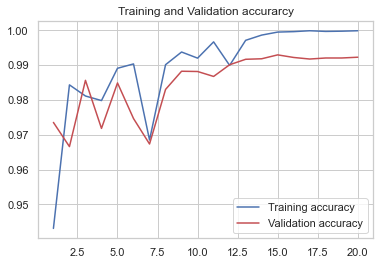

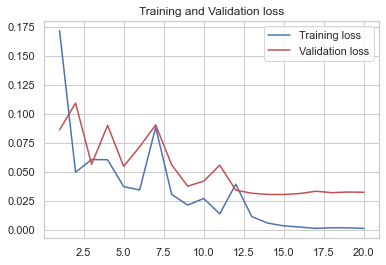

In [ ]:
acc = model2_history.history['accuracy']
val_acc = model2_history.history['val_accuracy']
loss = model2_history.history['loss']
val_loss = model2_history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
model2 = load_model('onehot_lemm_LSTM_model.h5')
y_pred = model2.predict_classes(X_test)
print("Accuracy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))

Accuracy: 99.29


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[7020   59]
 [  36 6292]]


In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7079
           1       0.99      0.99      0.99      6328

    accuracy                           0.99     13407
   macro avg       0.99      0.99      0.99     13407
weighted avg       0.99      0.99      0.99     13407



##### With One hot vector and stemmed text LSTM model is giving 98.7 % accuracy.

### Using Glove Vectors and LSTM

### GloVe is a type of embedding obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, GRU
from tensorflow.keras.callbacks import History 

from wordcloud import WordCloud, STOPWORDS

In [ ]:
final_text_result = np.load('final_text_result.npy')

In [ ]:
X_final = np.array(final_text_result)
y_final = dataset['Category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.3, random_state = 0)

In [ ]:
max_words = 10000
tokenizer = text.Tokenizer(num_words=max_words)

In [ ]:
tokenizer.fit_on_texts(X_train)

In [ ]:
# Generate sequence of Tokens
X_train_sequence = tokenizer.texts_to_sequences(X_train)
X_test_sequence = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Pad the sequences
X_train_pad = sequence.pad_sequences(X_train_sequence, maxlen=sent_length)
X_test_pad = sequence.pad_sequences(X_test_sequence, maxlen=sent_length)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
print("Train Text:", X_train[0])
print("\nSequence before padding: ", X_train_sequence[0])
print("\nSequence after padding: ", X_train_pad[0])

Train Text: benghazi liars back susan rice adam schiff caught another huge scandal time target president trump video white house lawyers last month learned former national security adviser susan rice requested identities u persons raw intelligence reports dozens occasions connect donald trump transition campaign according u officials familiar matter pattern rice requests discovered national security council review government policy unmasking identities individuals u targets electronic eavesdropping whose communications collected incidentally normally names redacted summaries monitored conversations appear reports something like u person one us remember susan rice going media lying blitz behalf hillary president barack obama told millions viewers several networks benghazi attack spontaneous event caused video know lie video cause attack american consulate benghazi compilation susan rice lying media reason benghazi attack national security council senior director intelligence ezra cohen 

#### Word Embeddings using Glove vectors

### download glove embeddings from : https://www.kaggle.com/datasets/bertcarremans/glovetwitter27b100dtxt

### learn about the file : https://zenodo.org/record/3237458#.YxY6HXZBxPY

In [ ]:
GLOVE_EMBEDDINGS_FILE = "glove.twitter.27B.100d.txt"

In [ ]:
%%time
embedding_vectors = {}
with open(GLOVE_EMBEDDINGS_FILE,'r',encoding='utf-8') as file:
    for row in file:
        values = row.split(' ')
        word = values[0]
        weights = np.asarray([float(val) for val in values[1:]])
        embedding_vectors[word] = weights
print("Size of vocabulary in GloVe: ", len(embedding_vectors))  

Size of vocabulary in GloVe:  1193514
Wall time: 51.9 s


#### Create embedding matrix

In [ ]:
#initialize the embedding_matrix with zeros
emb_dim = 100
if max_words is not None: 
    vocab_len = max_words 
else:
    vocab_len = len(word_index)+1
embedding_matrix = np.zeros((vocab_len, emb_dim))
oov_count = 0
oov_words = []
for word, idx in word_index.items():
    if idx < vocab_len:
        embedding_vector = embedding_vectors.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector
        else:
            oov_count += 1 
            oov_words.append(word)
#print some of the out of vocabulary words
print("Out of vocabulary words: ", oov_words[0:5])

Out of vocabulary words:  ['000', '1', '2016', '2', '10']


In [ ]:
print("{} out of {} words are Out of Vocabulary".format(str(oov_count), str(vocab_len)))

327 out of 10000 words are Out of Vocabulary


In [ ]:
lstm_model = Sequential()
lstm_model.add(Embedding(vocab_len, emb_dim, trainable = False, weights=[embedding_matrix]))
lstm_model.add(LSTM(128, return_sequences=False))
# lstm_model.add(Dropout(0.25))
lstm_model.add(Dense(1, activation = 'sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(lstm_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         1000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 1,117,377
Trainable params: 117,377
Non-trainable params: 1,000,000
_________________________________________________________________
None


In [ ]:
%%time
check_point = ModelCheckpoint('glove_normal_LSTM_model.h5',monitor='val_loss', verbose=1, save_best_only=True)
seq_model1 = lstm_model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=20, batch_size = 256, callbacks=([reduce_lr,check_point, early_stop]))

Epoch 1/20
123/123 [==============================] - ETA: 0s - loss: 0.2215 - accuracy: 0.9167
Epoch 00001: val_loss improved from inf to 0.11831, saving model to glove_normal_LSTM_model.h5
123/123 [==============================] - 440s 4s/step - loss: 0.2215 - accuracy: 0.9167 - val_loss: 0.1183 - val_accuracy: 0.9577
Epoch 2/20
123/123 [==============================] - ETA: 0s - loss: 0.2098 - accuracy: 0.9147
Epoch 00002: val_loss did not improve from 0.11831
123/123 [==============================] - 460s 4s/step - loss: 0.2098 - accuracy: 0.9147 - val_loss: 0.1258 - val_accuracy: 0.9541
Epoch 3/20
123/123 [==============================] - ETA: 0s - loss: 0.1394 - accuracy: 0.9498
Epoch 00003: val_loss did not improve from 0.11831
123/123 [==============================] - 489s 4s/step - loss: 0.1394 - accuracy: 0.9498 - val_loss: 0.1551 - val_accuracy: 0.9494
Epoch 4/20
123/123 [==============================] - ETA: 0s - loss: 0.1948 - accuracy: 0.9245
Epoch 00004: val_loss d

#### Evaluate Model

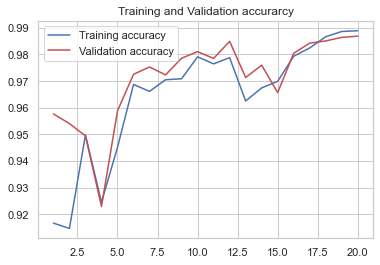

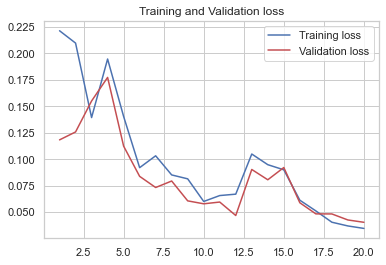

In [ ]:
acc = seq_model1.history['accuracy']
val_acc = seq_model1.history['val_accuracy']
loss = seq_model1.history['loss']
val_loss = seq_model1.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
train_lstm_results = lstm_model.evaluate(X_train_pad, y_train, verbose=0, batch_size=256)
test_lstm_results = lstm_model.evaluate(X_test_pad, y_test, verbose=0, batch_size=256)
print("Train accuracy: {}".format(train_lstm_results[1]*100))
print("Test accuracy: {}".format(test_lstm_results[1]*100))

Train accuracy: 98.81721138954163
Test accuracy: 98.68725538253784


In [ ]:
lstm_model = load_model('glove_normal_LSTM_model.h5')
y_pred = lstm_model.predict_classes(X_test_pad)
print("Accuracy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))

Accuracy: 98.69


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[7003   76]
 [ 100 6228]]


In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7079
           1       0.99      0.98      0.99      6328

    accuracy                           0.99     13407
   macro avg       0.99      0.99      0.99     13407
weighted avg       0.99      0.99      0.99     13407

